In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from PIL import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set(style='ticks', context='notebook', font_scale=1.2)

# Create combinatorial library

In [4]:
df_templates = pd.read_csv('template_frags.csv').iloc[:10, :]
df_alkynes = pd.read_csv('alkyne_frags.csv').iloc[:27, :]

In [5]:
def sanitize_smiles(smi):
    m = Chem.MolFromSmiles(smi) 
    Chem.SanitizeMol(m)
    return Chem.MolToSmiles(m)


def sonogashira(smi_template, smi_alkyne):
    mol1 = Chem.MolFromSmiles(smi_template)
    mol2 = Chem.MolFromSmiles(smi_alkyne)
    smarts = "[#6:1]-[I,Br,Cl].[C:2]#[$([CH1]),$([#6X2][Si])]>>[*:1]C#[C:2]"
    rxn = AllChem.ReactionFromSmarts(smarts)
    reacts = (mol1, mol2)
    products = rxn.RunReactants(reacts) # tuple
    p = products[0][0]
    Chem.SanitizeMol(p)
    return p

In [6]:
mols = []
templates_smi = []
alkynes_smi = []
templates_name = []
alkynes_name = []

for i_tem in df_templates.index:
    for i_alk in df_alkynes.index:
        smi_tem = df_templates.loc[i_tem, 'smiles']
        smi_alk = df_alkynes.loc[i_alk, 'smiles']
        
        name_tem = df_templates.loc[i_tem, 'name']
        name_alk = df_alkynes.loc[i_alk, 'name']
        
        # react
        p = sonogashira(smi_tem, smi_alk)
        
        # append info
        mols.append(p)
        templates_smi.append(sanitize_smiles(smi_tem))
        alkynes_smi.append(sanitize_smiles(smi_alk))
        templates_name.append(name_tem)
        alkynes_name.append(name_alk)

In [8]:
d = {'template_name':templates_name, 'alkyne_name':alkynes_name, 
     'template_smi':templates_smi, 'alkyne_smi':alkynes_smi, 
     'molecule_smi':[Chem.MolToSmiles(m) for m in mols]}
df = pd.DataFrame(d)
print(df.shape)
df

(270, 5)


,template_name,alkyne_name,template_smi,alkyne_smi,molecule_smi
0,8-1,22-1,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,C#Cc1cnc2ccc(C(=N)OC)cn12,COC(=N)c1ccc2ncc(C#Cc3cc(C(=O)Nc4ccc(CN5CCN(C)...
1,8-1,22-2,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,C#Cc1cnc2ccccn12,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...
2,8-1,22-3,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,C#Cc1cnc2ccc(C(F)(F)F)cn12,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...
3,8-1,22-4,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,C#Cc1cnc2cccnn12,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...
4,8-1,22-5,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,C#Cc1cncc2nccn12,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...
...,...,...,...,...,...
265,19,22-23,CN1CCN(Cc2ccc(NC(=O)Nc3cc(Br)n(C)n3)cc2C(F)(F)...,C#Cc1ccc(N)nc1,CN1CCN(Cc2ccc(NC(=O)Nc3cc(C#Cc4ccc(N)nc4)n(C)n...
266,19,22-24,CN1CCN(Cc2ccc(NC(=O)Nc3cc(Br)n(C)n3)cc2C(F)(F)...,C#Cc1ccccc1F,CN1CCN(Cc2ccc(NC(=O)Nc3cc(C#Cc4ccccc4F)n(C)n3)...
267,19,22-25,CN1CCN(Cc2ccc(NC(=O)Nc3cc(Br)n(C)n3)cc2C(F)(F)...,C[Si](C)(C)C#Cc1cnc2nccn2c1,CN1CCN(Cc2ccc(NC(=O)Nc3cc(C#Cc4cnc5nccn5c4)n(C...
268,19,22-26,CN1CCN(Cc2ccc(NC(=O)Nc3cc(Br)n(C)n3)cc2C(F)(F)...,C[Si](C)(C)C#Cc1cncc2nc[nH]c12,CN1CCN(Cc2ccc(NC(=O)Nc3cc(C#Cc4cncc5nc[nH]c45)...


In [395]:
img = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(300, 300), maxMols=300)
png = img.data
with open('all_momlecules.png', 'wb+') as outf:
    outf.write(png)

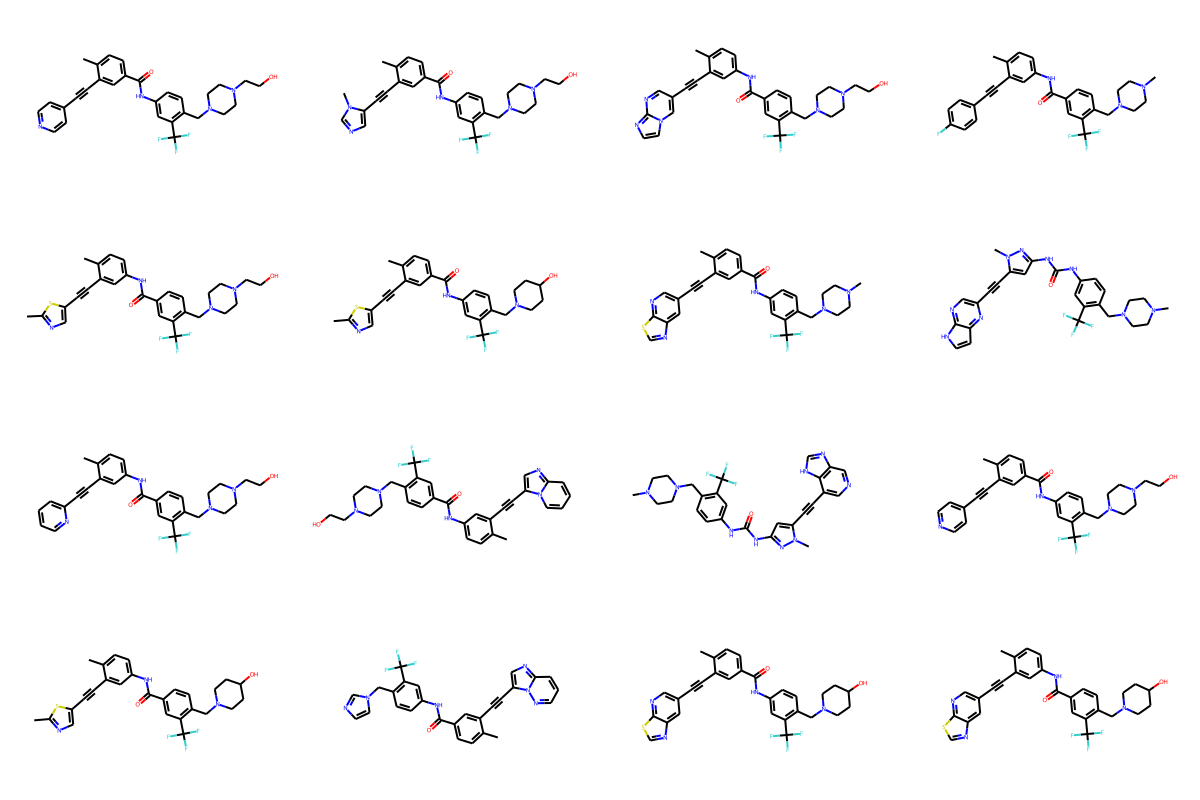

In [6]:
# check some molecules at random
Draw.MolsToGridImage(np.random.choice(mols, size=16), molsPerRow=4, subImgSize=(300, 200))

In [9]:
# load IC50s
df_results = pd.read_csv('exp_results.csv').iloc[:96, :]
df_results = df_results.rename(columns={'template':'template_name', 'alkyne':'alkyne_name'})

In [10]:
ic50 = df_results.loc[:, 'abl1_ic50_nM'].to_numpy()
df_results.loc[:, 'abl1_pIC50'] = - np.log10(ic50 * 10**(-9))

In [11]:
df_merged = df.merge(df_results, on=['template_name', 'alkyne_name'])
df_minimal = df_merged.drop(columns=['template_name', 'alkyne_name', 'template_smi', 'alkyne_smi', 
                        'synthesis_order', 'abl1_ic50_nM', 'abl2_ic50_nM'])

In [12]:
#df_merged.to_csv('data.csv', index=False)
#df_minimal.to_csv('abl_data_minimal.csv', index=False)

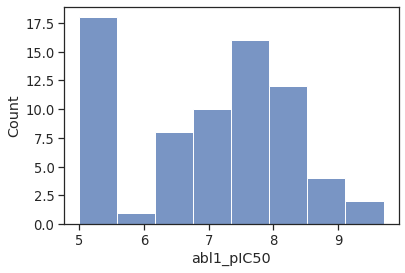

In [13]:
_ = sns.histplot(df_merged.loc[:, 'abl1_pIC50'])

In [14]:
mask = df_merged.loc[:, 'abl1_pIC50'] > 9.
print(sum(mask)/len(mask))
df_merged.loc[mask, :]

0.020833333333333332


,template_name,alkyne_name,template_smi,alkyne_smi,molecule_smi,synthesis_order,abl1_ic50_nM,abl2_ic50_nM,synthesis_success,abl1_pIC50
3,8-1,22-5,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,C#Cc1cncc2nccn12,Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)...,26.0,0.2,2.3,yes,9.69897
83,19,22-6,CN1CCN(Cc2ccc(NC(=O)Nc3cc(Br)n(C)n3)cc2C(F)(F)...,C#Cc1cnc2cnccn12,CN1CCN(Cc2ccc(NC(=O)Nc3cc(C#Cc4cnc5cnccn45)n(C...,25.0,0.4,3.3,yes,9.39794


In [157]:
df_regression = df_minimal.drop(columns=['synthesis_success'])
df_regression = df_regression.dropna()
df_regression.to_csv('../chemprop/regression.csv', index=False)

In [161]:
df_classification = df_minimal.drop(columns=['abl1_pIC50'])
b = [0 if s=='no' else 1 for s in df_classification.loc[:, 'synthesis_success']]
df_classification.loc[:, 'synthesis_success'] = b
df_classification.to_csv('../chemprop/classification.csv', index=False)

# Train emulators

In [247]:
import gpflow
from gpflow.mean_functions import Constant
from gpflow.utilities import print_summary
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append('../FlowMO/') 
from GP.kernels import SSK, Tanimoto
from property_prediction.data_utils import transform_data, TaskDataLoader, featurise_mols

In [248]:
smiles_list = df_minimal.dropna().loc[:, 'molecule_smi'].to_numpy()
smiles = np.array(smiles_list, dtype=object).reshape(-1,1)
y = df_minimal.dropna().loc[:, 'abl1_pIC50'].to_numpy().reshape(-1, 1)

In [249]:
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(smiles, y_scaled, test_size=0.2)
y_test = y_scaler.inverse_transform(y_test)

In [44]:
# kernel choices
max_subsequence_length = 5
alphabet = list(set("".join([x[0] for x in X_train])))
k = SSK(batch_size=4000, gap_decay=0.46, match_decay=0.99, alphabet=alphabet, 
        max_subsequence_length=max_subsequence_length, maxlen=85)
cst = gpflow.kernels.Constant(2.75)
m = gpflow.models.GPR(data=(X_train, y_train), mean_function=Constant(-1.7), kernel= cst*k, noise_variance=0.056)
loss=m.log_marginal_likelihood()

# fit model 
optimizer = gpflow.optimizers.Scipy()
optimizer.minimize(m.training_loss , m.trainable_variables, options=dict(ftol=0.00001), compile=False)

InvalidArgumentError: Input matrix is not invertible. [Op:MatrixTriangularSolve]

In [250]:
X = featurise_mols(smiles_list, 'fingerprints')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [164]:
def scale_y(y_train, y_test):
    y_scaler = StandardScaler()
    y_train_scaled = y_scaler.fit_transform(y_train)
    y_test_scaled = y_scaler.inverse_transform(y_test)
    return y_train_scaled, y_test_scaled, y_scaler

y_train_scaled, y_test_scaled, y_scaler = scale_y(y_train, y_test)

In [165]:
def train_tanimoto(X_train, y_train):
    
    # We define the Gaussian Process Regression training objective
    m = None
    def objective_closure():
        return -m.log_marginal_likelihood()

    X_train = X_train.astype(np.float64)

    k = Tanimoto()
    m = gpflow.models.GPR(data=(X_train, y_train), mean_function=Constant(np.mean(y_train)), kernel=k, noise_variance=1)

    # Optimise the kernel variance and noise level by the marginal likelihood
    opt = gpflow.optimizers.Scipy()
    opt.minimize(objective_closure, m.trainable_variables, options=dict(maxiter=100))
    #print_summary(m)  # Model summary
    return m

m = train_tanimoto(X_train, y_train_scaled)

In [166]:
def test_model(X_test, y_scaler):

    X_test = X_test.astype(np.float64)
    
    # mean and variance GP prediction
    y_pred, y_var = m.predict_f(X_test)
    y_pred = y_scaler.inverse_transform(y_pred)
    y_var = y_scaler.inverse_transform(y_var)
    #y_test = y_scaler.inverse_transform(y_test)
    return y_pred, y_var
    
y_pred, y_var = test_model(X_test, y_scaler)

In [167]:
# Compute R^2, RMSE and MAE on test set molecules
from scipy.stats import pearsonr

pears = pearsonr(y_test.flatten(), y_pred.flatten())[0]
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Pears: {:.3f}".format(pears))
print("RMSE: {:.3f}".format(rmse))

Pears: 0.923
RMSE: 0.620


(4.5, 10.0)

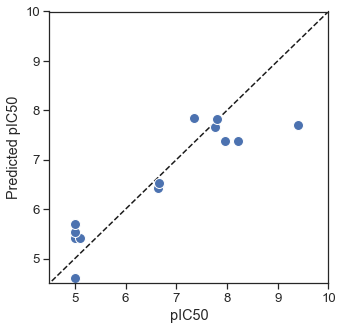

In [168]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(y_test, y_pred, s=100, edgecolor='white')
#ax.errorbar(x=y_test, y=y_pred, yerr=np.sqrt(y_var.flatten()), fmt='o')

ax.set_xlabel('pIC50')
ax.set_ylabel('Predicted pIC50')

ax.plot([1,100], [1,100], linestyle='--', color='k', zorder=0)

ax.set_xlim([4.5, 10])
ax.set_ylim([4.5, 10])

In [268]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)
kf.get_n_splits(X)

#print(kf)

rmse_folds = []
pears_folds = []
y_pred_folds = []
y_test_folds = []
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    y_train_scaled, y_test_scaled, y_scaler = scale_y(y_train, y_test)
    
    m = train_tanimoto(X_train, y_train_scaled)
    y_pred, y_var = test_model(X_test, y_scaler)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    pears = pearsonr(y_test.flatten(), y_pred.flatten())[0]
    rmse_folds.append(rmse)
    pears_folds.append(pears)
    
    y_pred_folds.append(y_pred)
    y_test_folds.append(y_test)
    
    print()

TRAIN: [ 0  1  3  4  5  6  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26
 27 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 47 48 49 51 52 53
 54 56 57 58 59 60 61 62 63 64 65 66 67 69 70] TEST: [ 2  7 18 31 46 50 55 68]

TRAIN: [ 1  2  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 49 50 52 53
 54 55 56 57 58 59 60 62 63 64 65 66 67 68 69 70] TEST: [ 0  3 16 32 48 51 61]

TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 27 28 29 30 31 32 33 34 35 36 38 39 40 41 42 43 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68] TEST: [ 9 15 26 37 44 69 70]

TRAIN: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24 25
 26 27 28 29 31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 55 56 57 58 59 60 61 62 63 64 65 66 68 69 70] TEST: [ 6 20 30 35 53 54 67]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 15 16 17 18 19 20 

RMSE = 0.55 +/- 0.24
Pears = 0.90 +/- 0.12


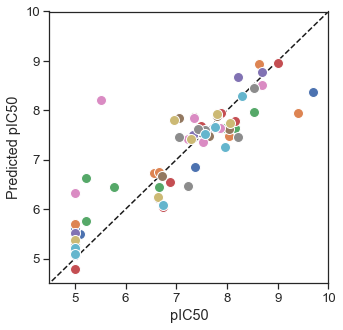

In [269]:
fig, ax = plt.subplots(figsize=(5,5))

for yt, yp in zip(y_test_folds, y_pred_folds):
    ax.scatter(yt, yp, s=100, edgecolor='white')

ax.set_xlabel('pIC50')
ax.set_ylabel('Predicted pIC50')

ax.plot([1,100], [1,100], linestyle='--', color='k', zorder=0)

ax.set_xlim([4.5, 10])
ax.set_ylim([4.5, 10])

print(f"RMSE = {np.mean(rmse_folds):.2f} +/- {np.std(rmse_folds):.2f}")
print(f"Pears = {np.mean(pears_folds):.2f} +/- {np.std(pears_folds):.2f}")

In [311]:
smiles_list = df_minimal.loc[:, 'molecule_smi'].to_numpy()
smiles = np.array(smiles_list, dtype=object).reshape(-1,1)
y = np.array([1 if x == 'yes' else 0 for x in df_minimal.loc[:, 'synthesis_success']]).reshape(-1,1)

In [312]:
X = featurise_mols(smiles_list, 'fingerprints')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [294]:
def invlink(f):
    return gpflow.likelihoods.Bernoulli().invlink(f).numpy()

In [302]:
def train_tanimoto_classification(X_train, y_train):
    
    # We define the Gaussian Process Regression training objective
    #m = None
    #def objective_closure():
    #    return -m.log_marginal_likelihood()

    X_train = X_train.astype(np.float64)

    k = Tanimoto()
    #m = gpflow.models.GPR(data=(X_train, y_train), mean_function=Constant(np.mean(y_train)), kernel=k, noise_variance=1)
    m = gpflow.models.VGP(data=(X_train, y_train), likelihood=gpflow.likelihoods.Bernoulli(), kernel=k)

    # Optimise the kernel variance and noise level by the marginal likelihood
    opt = gpflow.optimizers.Scipy()
    #opt.minimize(objective_closure, m.trainable_variables, options=dict(maxiter=100))
    opt.minimize(m.training_loss, m.trainable_variables, options=dict(maxiter=100))
    #print_summary(m)  # Model summary
    return m

In [303]:
m = train_tanimoto_classification(X_train, y_train)
gpflow.utilities.print_summary(m, fmt="notebook")

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,2.4948048034781145
VGP.q_mu,Parameter,Identity,,True,"(76, 1)",float64,[[0.70843725...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 76, 76)",float64,"[[[5.40300770e-01, 0.00000000e+00, 0.00000000e+00..."


In [304]:
X_test = X_test.astype(np.float64)
y_pred_, y_var_ = m.predict_f(X_test)

In [305]:
y_pred = invlink(y_pred_)
y_pred_binary = [0 if y < 0.5 else 1 for y in y_pred]

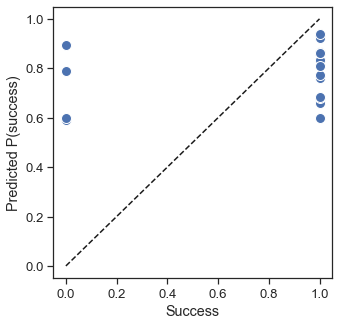

In [306]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(y_test, y_pred, s=100, edgecolor='white')

ax.set_xlabel('Success')
ax.set_ylabel('Predicted P(success)')

ax.plot([0,1], [0,1], linestyle='--', color='k', zorder=0)

#ax.set_xlim([, 10])
#ax.set_ylim([4.5, 10])

In [314]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=3, shuffle=True)

y_pred_folds = []
y_test_folds = []
for train_index, test_index in kf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    m = train_tanimoto_classification(X_train, y_train)
    
    X_test = X_test.astype(np.float64)
    y_pred_, y_var_ = m.predict_f(X_test)
    y_pred = invlink(y_pred_)
    
    y_pred_folds.append(y_pred)
    y_test_folds.append(y_test)
    
    print()

TRAIN: [ 0  1  2  3  4  5  6  7 10 12 13 14 15 16 18 20 22 24 25 28 29 31 32 34
 37 38 39 42 43 44 45 46 47 48 50 52 54 56 57 59 60 61 62 63 65 67 68 70
 72 74 76 77 78 81 82 85 87 88 89 90 91 93 94 95] TEST: [ 8  9 11 17 19 21 23 26 27 30 33 35 36 40 41 49 51 53 55 58 64 66 69 71
 73 75 79 80 83 84 86 92]

TRAIN: [ 0  4  5  6  7  8  9 11 12 13 15 16 17 18 19 20 21 22 23 24 26 27 30 31
 32 33 34 35 36 37 40 41 44 49 50 51 53 54 55 57 58 62 63 64 66 68 69 71
 72 73 75 77 78 79 80 82 83 84 85 86 89 91 92 94] TEST: [ 1  2  3 10 14 25 28 29 38 39 42 43 45 46 47 48 52 56 59 60 61 65 67 70
 74 76 81 87 88 90 93 95]

TRAIN: [ 1  2  3  8  9 10 11 14 17 19 21 23 25 26 27 28 29 30 33 35 36 38 39 40
 41 42 43 45 46 47 48 49 51 52 53 55 56 58 59 60 61 64 65 66 67 69 70 71
 73 74 75 76 79 80 81 83 84 86 87 88 90 92 93 95] TEST: [ 0  4  5  6  7 12 13 15 16 18 20 22 24 31 32 34 37 44 50 54 57 62 63 68
 72 77 78 82 85 89 91 94]



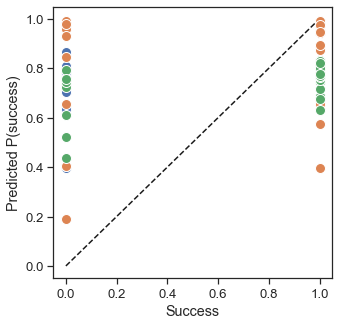

In [316]:
fig, ax = plt.subplots(figsize=(5,5))

for yt, yp in zip(y_test_folds, y_pred_folds):
    ax.scatter(yt, yp, s=100, edgecolor='white')

ax.set_xlabel('Success')
ax.set_ylabel('Predicted P(success)')

ax.plot([0,1], [0,1], linestyle='--', color='k', zorder=0)

#ax.set_xlim([, 10])
#ax.set_ylim([4.5, 10])

## Playground

In [5]:
smiles1 = "IC1=CC(C(NC2=CC(C(F)(F)F)=C(CN3CCN(C)CC3)C=C2)=O)=CC=C1C"
smiles2 = "N=C(OC)C(C=C1)=CN2C1=NC=C2C#C"

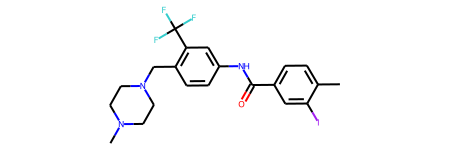

In [6]:
mol1 = Chem.MolFromSmiles(smiles1)
mol1

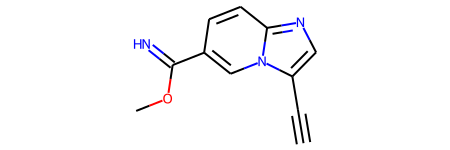

In [7]:
mol2 = Chem.MolFromSmiles(smiles2)
mol2

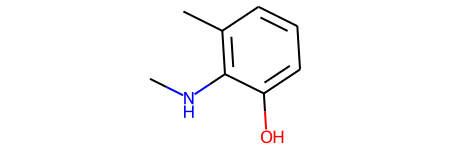

In [11]:
rxn = AllChem.ReactionFromSmarts('[c:1][#0].[#0][*:2]>>[c:1]-[*:2]')
reacts = (Chem.MolFromSmiles('*c1c(C)cccc1(O)'),Chem.MolFromSmiles('CN*'))
products = rxn.RunReactants(reacts) # tuple
products[0][0]

In [66]:
#smarts="[C:1]#[C].[c:2]-[I,Br,Cl]>>[*:1]-[*:2]"
smarts="[C,c]-C#[C:1].[C:2][-I]>>[*:1]-[*:2]"

rxn = AllChem.ReactionFromSmarts(smarts)
reacts = (mol1, mol2)
products = rxn.RunReactants(reacts) # tuple
products

()

In [ ]:
smarts = """
    [#6:1]-[$([B](-O)(-O)),$([B](-F)(-F)(-F))]
    .
    [c:2]-[I,Br,Cl]
    >>[*:1]-[*:2]
"""

In [ ]:
rxn = AllChem.ReactionFromSmarts('[c:1][#0].[#0][*:2]>>[c:1]-[*:2]')
reacts = (mol1, mol2)
products = rxn.RunReactants(reacts) # tuple

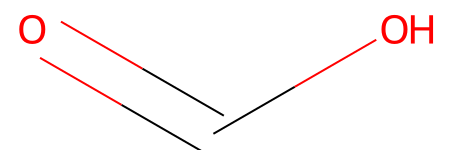

In [46]:
Chem.MolFromSmiles('C(=O)O')

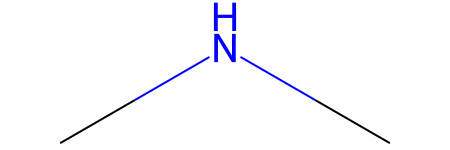

In [47]:
Chem.MolFromSmiles('CNC')

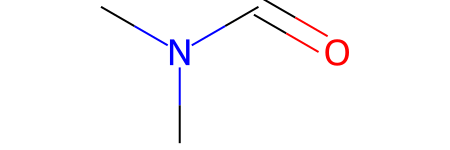

In [45]:
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])O.[N:3]>>[C:1](=[O:2])[N:3]')
reacts = (Chem.MolFromSmiles('C(=O)O'),Chem.MolFromSmiles('CNC'))
products = rxn.RunReactants(reacts)
products[0][0]

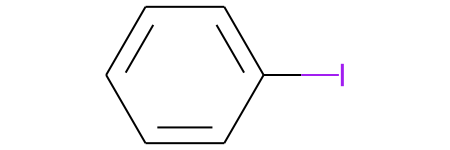

In [256]:
mol1 = Chem.MolFromSmiles("c1ccccc1I")
mol1

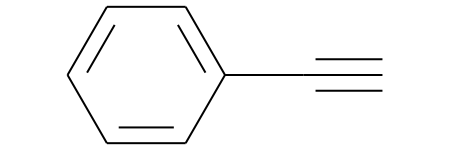

In [331]:
#mol2 = Chem.MolFromSmiles("c1ccccc1C#C[Si](C)(C)(C)")
#mol2 = Chem.MolFromSmiles("c1ccccc1C#CI")
mol2 = Chem.MolFromSmiles("c1ccccc1C#C")
mol2

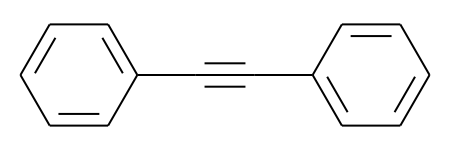

In [337]:
#smarts = "[#6:1]-[I,Br,Cl].[#6X2:2][Si]>>[*:1]-[*:2]"
#smarts = "[#6:1]-[I,Br,Cl].[CH1:2]>>[*:1]-[*:2]"
#smarts = "[#6:1]-[I,Br,Cl].[$([CH1]),$([#6X2][Si])]>>[*:1]-[*:2]"

#smarts = "[#6:1]-[I,Br,Cl].[$([CH1]),$([#6X2]):2]-[$([H]),$([Si])]>>[*:1]-[*:2]"
#smarts = "[#6:1]-[I,Br,Cl].[$([CH1]):2;$([#6X2])]-[$([H]);$([Si])]>>[*:1]-[*:2]"

#smarts = "[#6:1]-[I,Br,Cl].[$([CH1])],[$([#6X2][Si])]>>[*:1]-[*:2]"
smarts = "[#6:1]-[I,Br,Cl].[C:2]#[$([CH1]),$([#6X2][Si])]>>[*:1]C#[C:2]"

rxn = AllChem.ReactionFromSmarts(smarts)
reacts = (mol1, mol2)
products = rxn.RunReactants(reacts) # tuple
p = products[0][0]

# sanitize
Chem.SanitizeMol(p)
p

In [195]:
def example_class(x):
    if 1 < x< 5:
        return 1
    else:
        return 0

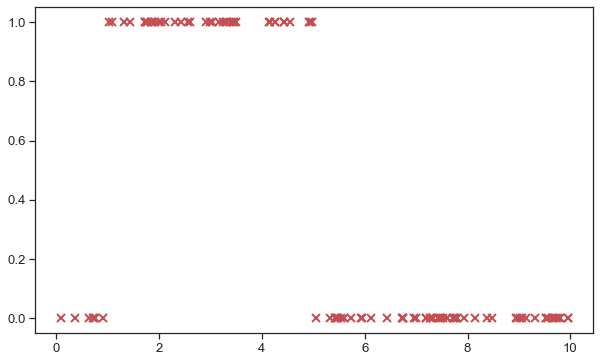

In [197]:
X = np.random.uniform(0,10,100)
Y = np.array([example_class(x) for x in X])

plt.figure(figsize=(10, 6))
_ = plt.plot(X, Y, "C3x", ms=8, mew=2)

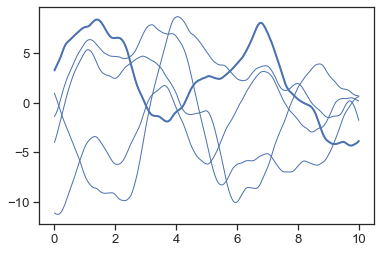

In [202]:
# build the kernel and covariance matrix
k = gpflow.kernels.Matern52(variance=20.0)
x_grid = np.linspace(0, 10, 200).reshape(-1, 1)
K = k(x_grid)

# sample from a multivariate normal
rng = np.random.RandomState(6)

L = np.linalg.cholesky(K)
f_grid = np.dot(L, rng.randn(200, 5))
plt.plot(x_grid, f_grid, "C0", linewidth=1)
_ = plt.plot(x_grid, f_grid[:, 1], "C0", linewidth=2)

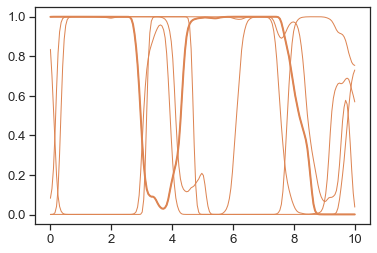

In [203]:
def invlink(f):
    return gpflow.likelihoods.Bernoulli().invlink(f).numpy()


p_grid = invlink(f_grid)
plt.plot(x_grid, p_grid, "C1", linewidth=1)
_ = plt.plot(x_grid, p_grid[:, 1], "C1", linewidth=2)

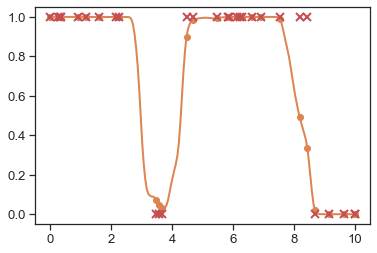

In [204]:
# Select some input locations
ind = rng.randint(0, 200, (30,))
X_gen = x_grid[ind]

# evaluate probability and get Bernoulli draws
p = p_grid[ind, 1:2]
Y_gen = rng.binomial(1, p)

# plot
plt.plot(x_grid, p_grid[:, 1], "C1", linewidth=2)
plt.plot(X_gen, p, "C1o", ms=6)
_ = plt.plot(X_gen, Y_gen, "C3x", ms=8, mew=2)

In [207]:
m = gpflow.models.VGP(
    (X.reshape(-1,1), Y.reshape(-1,1)), likelihood=gpflow.likelihoods.Bernoulli(), kernel=gpflow.kernels.Matern52()
)

opt = gpflow.optimizers.Scipy()
opt.minimize(m.training_loss, variables=m.trainable_variables)

      fun: 11.653047623450103
 hess_inv: <5152x5152 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 1.95341267e-04, -1.28238352e-05, -1.49274364e-03, ...,
       -1.13380199e-16,  2.75728267e-15, -1.23164829e-08])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1296
      nit: 1235
     njev: 1296
   status: 0
  success: True
        x: array([ 2.79866270e+00,  2.43007096e+03, -1.11039582e+00, ...,
       -1.67639207e-15, -3.27072485e-17,  9.99999635e-01])

In [208]:
gpflow.utilities.print_summary(m, fmt="notebook")

name,class,transform,prior,trainable,shape,dtype,value
VGP.kernel.variance,Parameter,Softplus,,True,(),float64,2430.0709587909173
VGP.kernel.lengthscales,Parameter,Softplus,,True,(),float64,2.8577722339597678
VGP.q_mu,Parameter,Identity,,True,"(100, 1)",float64,[[-1.11039582e+00...
VGP.q_sqrt,Parameter,FillTriangular,,True,"(1, 100, 100)",float64,"[[[3.40268770e-01, 0.00000000e+00, 0.00000000e+00..."


(-3.0, 3.0)

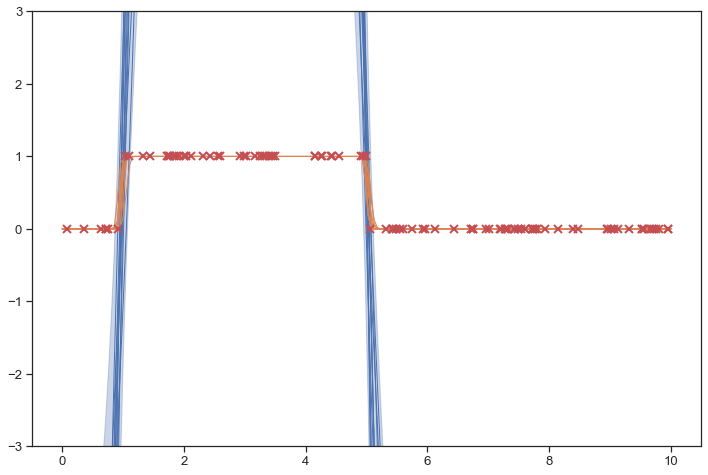

In [214]:
import tensorflow as tf 

plt.figure(figsize=(12, 8))

# bubble fill the predictions
mu, var = m.predict_f(x_grid)

plt.fill_between(
    x_grid.flatten(),
    np.ravel(mu + 2 * np.sqrt(var)),
    np.ravel(mu - 2 * np.sqrt(var)),
    alpha=0.3,
    color="C0",
)

# plot samples
tf.random.set_seed(6)
samples = m.predict_f_samples(x_grid, 10).numpy().squeeze().T

plt.plot(x_grid, samples, "C0", lw=1)

# plot p-samples
p = invlink(samples)
plt.plot(x_grid, p, "C1", lw=1)

# plot data
plt.plot(X, Y, "C3x", ms=8, mew=2)
plt.ylim((-3, 3))
